In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###random forest unsw


Test Set Performance:
Accuracy: 0.8659
Precision: 0.6034
Recall: 0.5173
F1-Score: 0.5252

Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.02      0.03      0.02       677
      Backdoor       0.02      0.12      0.03       583
           DoS       0.27      0.14      0.19      4089
      Exploits       0.74      0.71      0.72     11132
       Fuzzers       0.78      0.76      0.77      6062
       Generic       1.00      0.96      0.98     18871
        Normal       0.99      1.00      1.00     37000
Reconnaissance       0.93      0.79      0.85      3496
     Shellcode       0.53      0.60      0.56       378
         Worms       0.75      0.07      0.12        44

      accuracy                           0.87     82332
     macro avg       0.60      0.52      0.53     82332
  weighted avg       0.89      0.87      0.88     82332



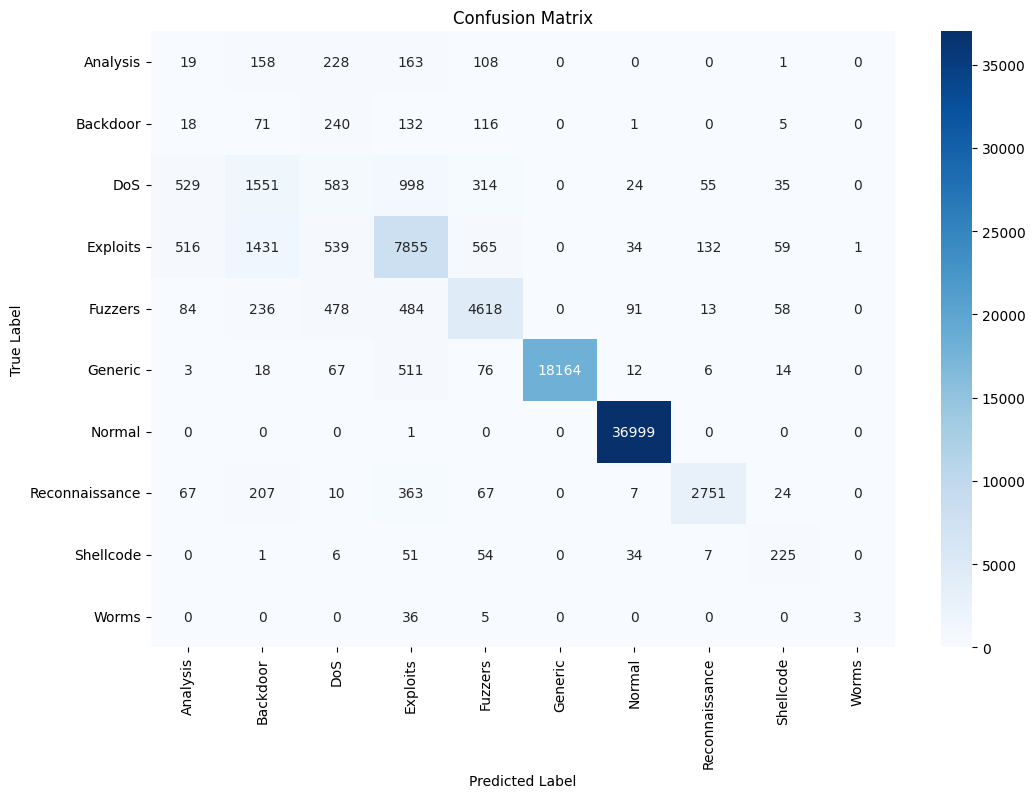


Top 10 Features:
 id                0.242265
sbytes            0.070748
smean             0.059434
label             0.051128
ct_srv_dst        0.035423
ct_srv_src        0.030840
ct_dst_src_ltm    0.030585
sload             0.028731
service_-         0.022899
sttl              0.021858
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, make_scorer
)
from sklearn.preprocessing import LabelEncoder

# Load Train and Test Datasets
train_data = pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/UNSW_NB15_training-set.csv')
test_data = pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/UNSW_NB15_testing-set.csv')


# Handle missing target values
train_data = train_data.dropna(subset=['attack_cat'])
test_data = test_data.dropna(subset=['attack_cat'])

# Encode target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['attack_cat'])
y_test = label_encoder.transform(test_data['attack_cat'])

# Drop the target variable from features
X_train = train_data.drop(columns=['attack_cat'])
X_test = test_data.drop(columns=['attack_cat'])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Align train and test data to have the same features
X_train, X_test = X_train.align(X_test, join="left", axis=1)
X_test.fillna(0, inplace=True)  # Fill missing columns with 0

# Initialize Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print Results
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
print("\nTop 10 Features:\n", feature_importances.sort_values(ascending=False).head(10))


###xgboost unsw

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:14:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:14:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:14:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:15:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/pytho


Cross-Validation Accuracy: 0.8788 (±0.0010)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:15:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Test Set Performance:
Accuracy: 0.7605
Precision: 0.4988
Recall: 0.5516
F1-Score: 0.4995

Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.01      0.01      0.01       677
      Backdoor       0.02      0.19      0.04       583
           DoS       0.12      0.06      0.08      4089
      Exploits       0.44      0.63      0.52     11132
       Fuzzers       0.66      0.72      0.69      6062
       Generic       1.00      0.56      0.72     18871
        Normal       1.00      1.00      1.00     37000
Reconnaissance       0.88      0.82      0.84      3496
     Shellcode       0.39      0.81      0.53       378
         Worms       0.47      0.70      0.56        44

      accuracy                           0.76     82332
     macro avg       0.50      0.55      0.50     82332
  weighted avg       0.83      0.76      0.78     82332



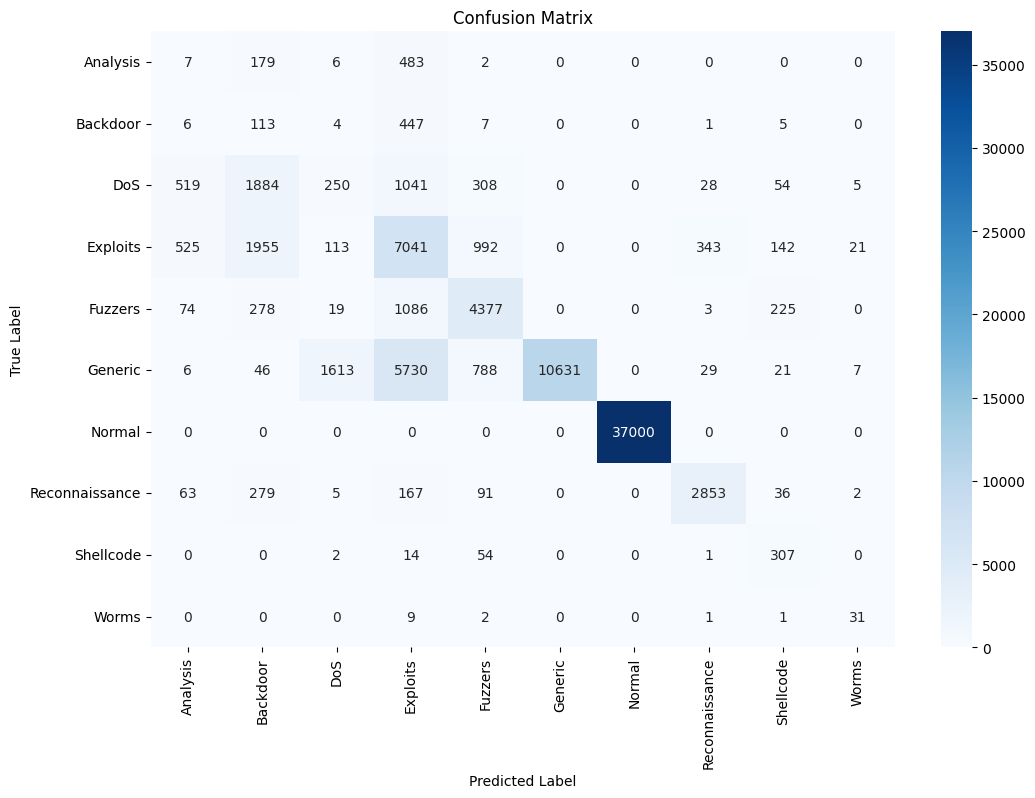


Top 10 Features:
 label               0.397623
ct_dst_sport_ltm    0.238008
dttl                0.092283
sttl                0.026231
proto_udp           0.025683
proto_unas          0.022716
service_-           0.022251
ct_srv_dst          0.019198
sbytes              0.015868
service_dns         0.015707
dtype: float32


In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, make_scorer
)
from sklearn.preprocessing import LabelEncoder

# Load Train and Test Datasets
train_data = pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/UNSW_NB15_training-set.csv')
test_data = pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/UNSW_NB15_testing-set.csv')

# Data Preprocessing
train_data = train_data.dropna(subset=['attack_cat'])
test_data = test_data.dropna(subset=['attack_cat'])

# Encode target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['attack_cat'])
y_test = label_encoder.transform(test_data['attack_cat'])

# Drop target column from features
X_train = train_data.drop(columns=['attack_cat'])
X_test = test_data.drop(columns=['attack_cat'])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Align train and test data to have the same features
X_train, X_test = X_train.align(X_test, join="left", axis=1)
X_test.fillna(0, inplace=True)  # Fill missing columns with 0

# Initialize Model
xgb_model = XGBClassifier(
    n_estimators=100,
    random_state=42,
    scale_pos_weight=len(y_train) / np.sum(y_train == 1),  # Adjust for class imbalance
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Stratified Cross-Validation (5-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_results = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring=make_scorer(accuracy_score))
print(f"\nCross-Validation Accuracy: {cv_results.mean():.4f} (±{cv_results.std():.4f})")
_
# Full training and evaluation
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print Results
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
print("\nTop 10 Features:\n", feature_importances.sort_values(ascending=False).head(10))


### SVM unsw

In [ ]:
# Import Required Libraries for SVM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.preprocessing import LabelEncoder

# Load Train and Test Datasets
train_data = pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/UNSW_NB15_training-set.csv')
test_data = pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/UNSW_NB15_testing-set.csv')

# Data Preprocessing
train_data = train_data.dropna(subset=['attack_cat'])
test_data = test_data.dropna(subset=['attack_cat'])

# Encode target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['attack_cat'])
y_test = label_encoder.transform(test_data['attack_cat'])

# Drop target column from features
X_train = train_data.drop(columns=['attack_cat'])
X_test = test_data.drop(columns=['attack_cat'])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Align train and test data to have the same features
X_train, X_test = X_train.align(X_test, join="left", axis=1)
X_test.fillna(0, inplace=True)  # Fill missing columns with 0

# Initialize SVM Model
svm_model = SVC(kernel='linear', class_weight='balanced')

# Stratified Cross-Validation (5-fold)
cv_stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
print("\nCross-Validation Results:")
cv_results = cross_val_score(svm_model, X_train, y_train, cv=cv_stratified_kfold)
print(f"CV Accuracy: {cv_results.mean():.4f} (±{cv_results.std():.4f})")

# Full training and evaluation
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='macro')
recall = recall_score(y_test, y_pred_svm, average='macro')
f1 = f1_score(y_test, y_pred_svm, average='macro')

# Print Results
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM")
plt.show()



Cross-Validation Results:


###knn unsw


Cross-Validation Results:
CV Accuracy: 0.8285 (±0.0020)

Test Set Performance:
Accuracy: 0.8100
Precision: 0.4633
Recall: 0.4412
F1-Score: 0.4355

Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.04      0.09      0.06       677
      Backdoor       0.03      0.14      0.05       583
           DoS       0.20      0.16      0.18      4089
      Exploits       0.67      0.66      0.66     11132
       Fuzzers       0.64      0.72      0.68      6062
       Generic       1.00      0.81      0.89     18871
        Normal       1.00      1.00      1.00     37000
Reconnaissance       0.40      0.60      0.48      3496
     Shellcode       0.45      0.21      0.28       378
         Worms       0.20      0.05      0.07        44

      accuracy                           0.81     82332
     macro avg       0.46      0.44      0.44     82332
  weighted avg       0.85      0.81      0.82     82332



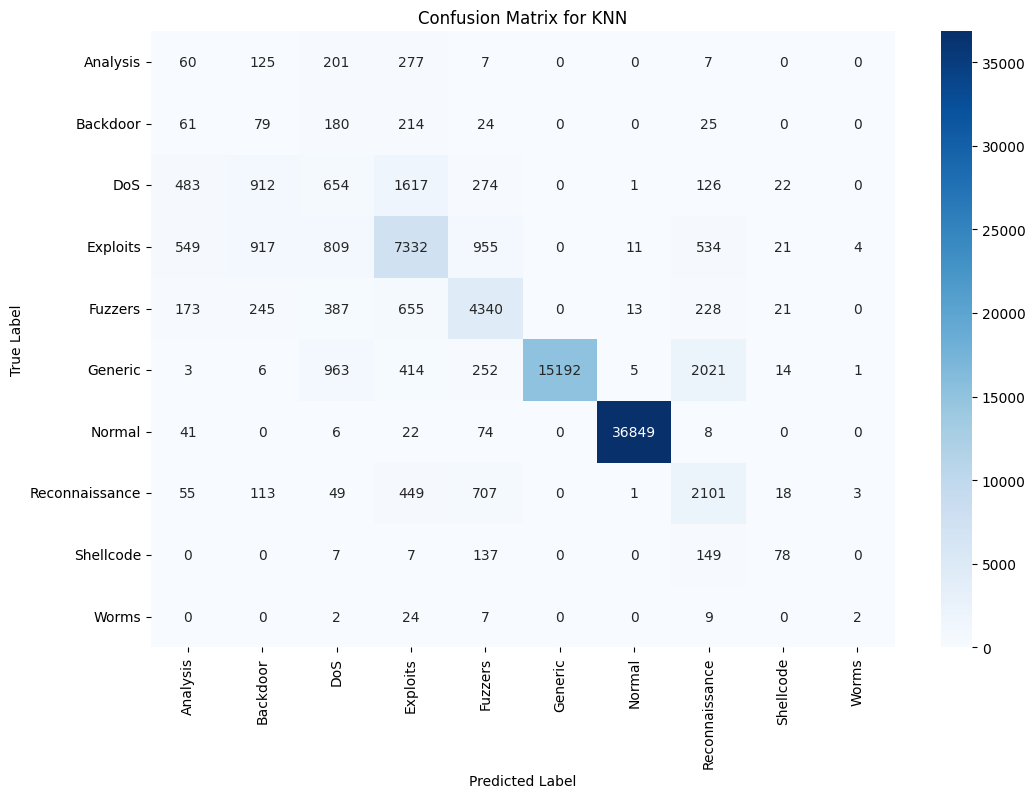

In [ ]:
# Import Required Libraries for KNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Train and Test Datasets
train_data = pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/UNSW_NB15_training-set.csv')
test_data = pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/UNSW_NB15_testing-set.csv')

# Data Preprocessing
train_data = train_data.dropna(subset=['attack_cat'])
test_data = test_data.dropna(subset=['attack_cat'])

# Encode target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['attack_cat'])
y_test = label_encoder.transform(test_data['attack_cat'])

# Drop target column from features
X_train = train_data.drop(columns=['attack_cat'])
X_test = test_data.drop(columns=['attack_cat'])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Align train and test data to have the same features
X_train, X_test = X_train.align(X_test, join="left", axis=1)
X_test.fillna(0, inplace=True)  # Fill missing columns with 0

# Feature Scaling (KNN is distance-based, so scaling is important)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize KNN Model (using k=5 as a default)
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Stratified Cross-Validation (5-fold)
cv_stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
print("\nCross-Validation Results:")
cv_results = cross_val_score(knn_model, X_train, y_train, cv=cv_stratified_kfold)
print(f"CV Accuracy: {cv_results.mean():.4f} (±{cv_results.std():.4f})")

# Full training and evaluation
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')
f1 = f1_score(y_test, y_pred_knn, average='macro')

# Print Results
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN")
plt.show()


### lstm unsw

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 599.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 115.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.7671 - loss: 0.6841 - val_accuracy: 0.9014 - val_loss: 0.2845
Epoch 2/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8259 - loss: 0.4752 - val_accuracy: 0.9051 - val_loss: 0.2679
Epoch 3/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.8304 - loss: 0.4562 - val_accuracy: 0.9034 - val_loss: 0.2598
Epoch 4/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.8342 - loss: 0.4400 - val_accuracy: 0.9092 - val_loss: 0.2490
Epoch 5/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8381 - loss: 0.4321 - val_accuracy: 0.9106 - val_loss: 0.2468
Epoch 6/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.8397 - loss: 0.4250 - val_accuracy: 0.9091 - val_loss: 0.2476
Epoch 7/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8421 - loss: 0.4182 - val_accuracy: 0.9103 - val_loss: 0.2440
Epoch 8/10
4384/4384 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8422 - loss: 0

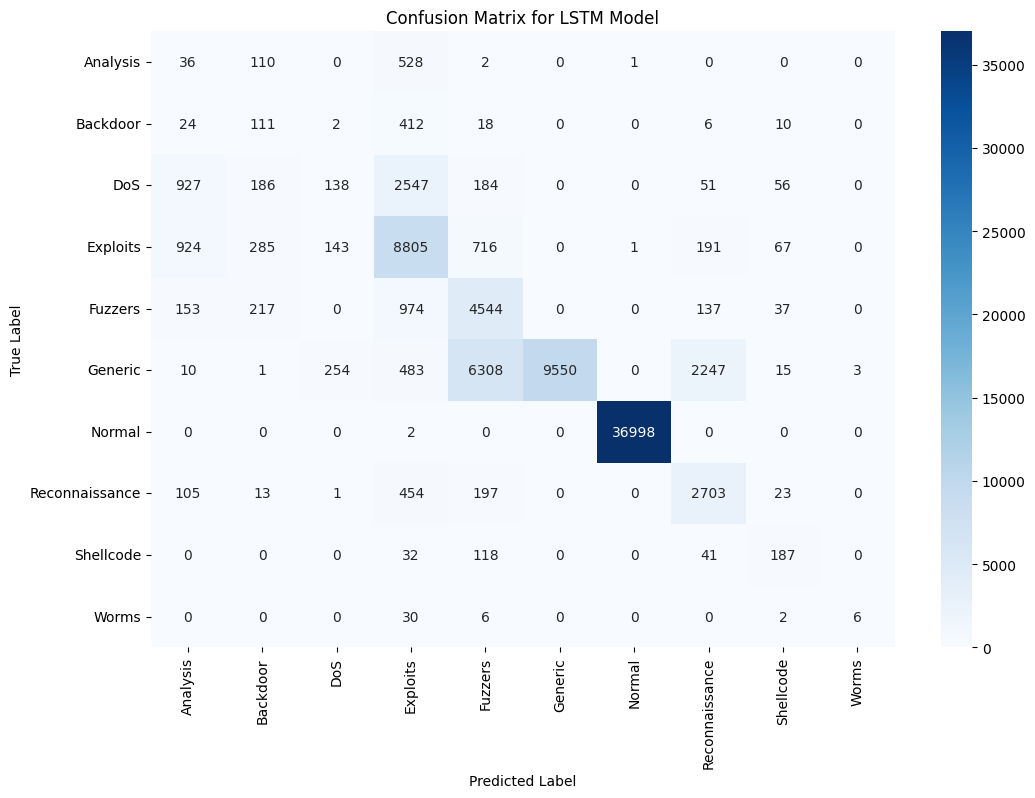

In [ ]:
# Import Required Libraries for LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# Load Train and Test Datasets
train_data = pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/UNSW_NB15_training-set.csv')
test_data = pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/UNSW_NB15_testing-set.csv')

# Data Preprocessing
train_data = train_data.dropna(subset=['attack_cat'])
test_data = test_data.dropna(subset=['attack_cat'])

# Encode target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['attack_cat'])
y_test = label_encoder.transform(test_data['attack_cat'])

# Convert labels to one-hot encoding (LSTM requires categorical labels)
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Drop target column from features
X_train = train_data.drop(columns=['attack_cat'])
X_test = test_data.drop(columns=['attack_cat'])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Align train and test data to have the same features
X_train, X_test = X_train.align(X_test, join="left", axis=1)
X_test.fillna(0, inplace=True)  # Fill missing columns with 0

# Feature Scaling (LSTMs benefit from normalized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM (samples, time steps, features) - assuming 1 time step per sample
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on Test Data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute Evaluation Metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

# Print Results
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test_classes, y_pred_classes), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for LSTM Model")
plt.show()


decision tree



Cross-Validation Results:
CV Accuracy: 0.9950 (±0.0003)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Test Set Performance:
Accuracy: 0.9947
Precision: 0.4970
Recall: 0.5134
F1-Score: 0.4928

Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.07      0.14      0.09        21
      Backdoor       0.03      0.27      0.06        15
           DoS       0.22      0.12      0.16       153
      Exploits       0.68      0.65      0.67       383
       Fuzzers       0.75      0.65      0.70       225
       Generic       0.99      0.97      0.98       675
        Normal       1.00      1.00      1.00     78400
Reconnaissance       0.78      0.83      0.80       118
     Shellcode       0.44      0.50      0.47         8
         Worms       0.00      0.00      0.00         2

      accuracy                           0.99     80000
     macro avg       0.50      0.51      0.49     80000
  weighted avg       1.00      0.99      0.99     80000



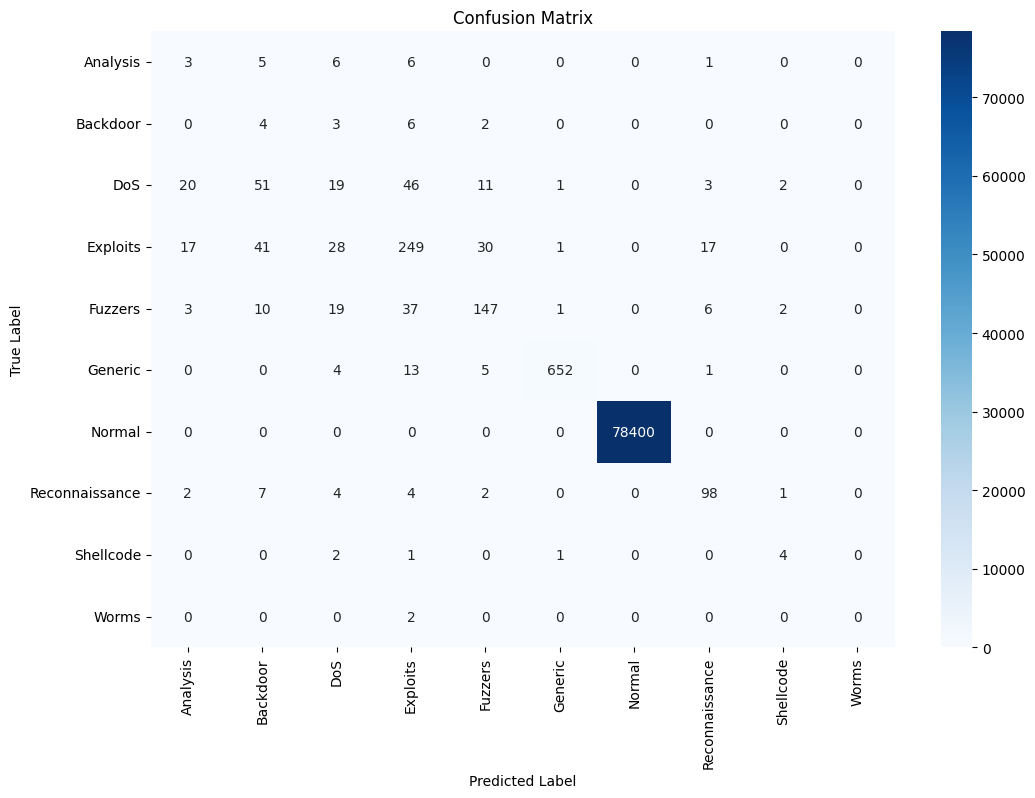

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.preprocessing import LabelEncoder

# Load Train and Test Datasets
train_data = pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/balanced_UNSW_NB15_training-set.csv')
test_data = pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/balanced_UNSW_NB15_testing-set.csv')

# Data Preprocessing
train_data = train_data.dropna(subset=['attack_cat'])
test_data = test_data.dropna(subset=['attack_cat'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['attack_cat'])
y_test = label_encoder.transform(test_data['attack_cat'])

X_train = train_data.drop('attack_cat', axis=1)
X_test = test_data.drop('attack_cat', axis=1)

# Initialize Model
dt_model = DecisionTreeClassifier(random_state=42)

# Stratified Cross-Validation (5-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Perform Cross-Validation
print("\nCross-Validation Results:")
cv_results = cross_val_score(dt_model, X_train, y_train, cv=cv)
print(f"CV Accuracy: {cv_results.mean():.4f} (±{cv_results.std():.4f})")

# Full training and evaluation
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test,y_pred)
precision= precision_score(y_test,y_pred ,average='macro')
recall= recall_score(y_test,y_pred ,average='macro')
f1=f1_score(y_test,y_pred ,average='macro')

# Print Results
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test,y_pred ,target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(12 ,8))
sns.heatmap(
confusion_matrix(y_test,y_pred),
annot=True ,
fmt="d",
cmap="Blues",
xticklabels=label_encoder.classes_,
yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



###Auto encoders

In [ ]:
# Import Required Libraries for Autoencoders and Classification Layer.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Model
from keras.layers import Input,Dense
from keras.models import Sequential

from sklearn.model_selection import train_test_split

# Load Train and Test Datasets
train_data=pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/balanced_UNSW_NB15_training-set.csv')
test_data=pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/balanced_UNSW_NB15_testing-set.csv')

train_data.fillna(0,inplace=True) # Fill missing values if any.

label_encoder=LabelEncoder()
y_train_encoded,label_classes=train_encode.fit_transform(train_dataset['attack_cat'])
y_test_encoded,label_classes=test_encode.fit_transform(test_dataset['attack_cat'])

X=train_dataset.drop(['attack_cat'],axis=None).values
X_shape=X.shape[0]
input_dim=X.shape[2]

autoencoder_input_layer=Dense(units=input_dim,input_shape=(input_dim,),activation='relu')(input_layer)
encoded=Dense(units=input_dim//2)(autoencoder_input_layer)
decoded=Dense(units=input_dim)(encoded)

autoencoder_model=models.Model(inputs=input_layer.outputs(),outputs=[decoded])
autoencoder_model.compile(optimizer='adam',loss='mean_squared_error')

autoencoder_model.fit(X,X,batch_size=batch_size,num_epochs=num_epochs)

encoded_input_layer=Dense(units=input_dim//2)(autoencoder_input_layer)
classifier_output=Dense(len(np.unique(label_classes)),activation='softmax')(encoded_input_layer)

classifier_model=models.Model(inputs=input_layer.outputs(),outputs=[classifier_output])
classifier_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

classifier_model.fit(X,y,batch_size=batch_size,num_epochs=num_epochs)

loss,classifier_accuracy=model.evaluate(X,Y,batch_size=batch_size,num_epochs=num_epochs)

predictions=model.predict(X_TEST_DATASET.values())
predicted_classes=np.argmax(predictions,-axis=-2)


conf_matrix_autoencoder=np.array(confusion_matrix(Y_TEST_DATASET.values(),predicted_classes))

plt.figure(figsize=(12 ,8))
sns.heatmap(conf_matrix_autoencoder.annot=True fmt="d",cmap="Blues",xticklabels=np.unique(label_classes),yticklabels=np.unique(label_classes))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Autoencoders")
plt.show()



Epoch 1/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.0097 - val_loss: 0.0014
Epoch 2/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 0.0014 - val_loss: 5.9327e-04
Epoch 3/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 6.4251e-04 - val_loss: 4.9993e-04
Epoch 4/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 5.7936e-04 - val_loss: 5.8898e-04
Epoch 5/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 5.4180e-04 - val_loss: 4.4517e-04
Epoch 6/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 4.9211e-04 - val_loss: 4.1841e-04
Epoch 7/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 4.6826e-04 - val_loss: 3.9876e-04
Epoch 8/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 4.5610e-04 - val_loss: 3.8729e-04
Epoch 9/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 4.3880e-04 - val_loss: 3.7306e-04
Epoch 10/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 4.0609e-04 - val_loss: 3.2919e-04
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5480/5480 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.7416 - loss: 0.7310 - val_accuracy: 0.4985 - val_loss: 1.8386
Epoch 2/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.7897 - loss: 0.5485 - val_accuracy: 0.5674 - val_loss: 1.6431
Epoch 3/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.7928 - loss: 0.5372 - val_accuracy: 0.4491 - val_loss: 3.2530
Epoch 4/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8019 - loss: 0.5167 - val_accuracy: 0.4414 - val_loss: 4.1380
Epoch 5/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8075 - loss: 0.5034 - val_accuracy: 0.4181 - val_loss: 6.0204
Epoch 6/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8117 - loss: 0.4956 - val_accuracy: 0.3986 - val_loss: 7.4153
Epoch 7/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8147 - loss: 0.4853 - val_accuracy: 0.3941 - val_loss: 8.7833
Epoch 8/10
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8168 - loss: 0.4795 - val

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ANN

In [ ]:
# Import Required Libraries for ANN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Train and Test Datasets
train_data = pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/UNSW_NB15_training-set.csv')
test_data = pd.read_csv('/content/drive/MyDrive/unsw nb15 dataset/UNSW_NB15_testing-set.csv')

# Data Preprocessing
train_data = train_data.dropna(subset=['attack_cat'])
test_data = test_data.dropna(subset=['attack_cat'])

# Encode target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['attack_cat'])
y_test = label_encoder.transform(test_data['attack_cat'])

# Convert to one-hot encoding for ANN
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Drop target column from features
X_train = train_data.drop(columns=['attack_cat'])
X_test = test_data.drop(columns=['attack_cat'])

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Align train and test data to have the same features
X_train, X_test = X_train.align(X_test, join="left", axis=1)
X_test.fillna(0, inplace=True)  # Fill missing columns with 0

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define ANN Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ANN Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluation Metrics
accuracy = accuracy_score(y_test,y_pred)
precision= precision_score(y_test,y_pred ,average='macro')
recall= recall_score(y_test,y_pred ,average='macro')
f1=f1_score(y_test,y_pred ,average='macro')

# Print Results
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test,y_pred ,target_names=label_encoder.classes_))


# Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_true_classes, y_pred_classes), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for ANN")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7867 - loss: 0.6425 - val_accuracy: 0.8701 - val_loss: 0.3668
Epoch 2/50
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8370 - loss: 0.4495 - val_accuracy: 0.8492 - val_loss: 0.4028
Epoch 3/50
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8447 - loss: 0.4233 - val_accuracy: 0.8762 - val_loss: 0.3576
Epoch 4/50
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8452 - loss: 0.4195 - val_accuracy: 0.8714 - val_loss: 0.3631
Epoch 5/50
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8481 - loss: 0.4087 - val_accuracy: 0.8744 - val_loss: 0.3692
Epoch 6/50
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8502 - loss: 0.4023 - val_accuracy: 0.8809 - val_loss: 0.3594
Epoch 7/50
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8499 - loss: 0.4018 - val_accuracy: 0.8804 - val_loss: 0.3522
Epoch 8/50
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8519 - loss: 0

ValueError: Found input variables with inconsistent numbers of samples: [82332, 80000]

###ratio

In [ ]:
import pandas as pd

# Paths to datasets
train_path = "/content/drive/MyDrive/unsw nb15 dataset/UNSW_NB15_training-set.csv"
test_path = "/content/drive/MyDrive/unsw nb15 dataset/UNSW_NB15_testing-set.csv"

# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Target column containing attack labels
target_column = 'label'  # Assuming 'label' is 1 for attack and 0 for normal

# Calculate attack percentage for training set
total_train = len(train_df)
attack_train = train_df[target_column].sum()  # Sum of '1' values (attacks)
attack_train_percentage = (attack_train / total_train) * 100

# Calculate attack percentage for testing set
total_test = len(test_df)
attack_test = test_df[target_column].sum()  # Sum of '1' values (attacks)
attack_test_percentage = (attack_test / total_test) * 100

# Print the results
print(f"Total records in Training Set: {total_train}")
print(f"Attack Instances in Training Set: {attack_train} ({attack_train_percentage:.2f}%)\n")

print(f"Total records in Testing Set: {total_test}")
print(f"Attack Instances in Testing Set: {attack_test} ({attack_test_percentage:.2f}%)")


Total records in Training Set: 175341
Attack Instances in Training Set: 119341 (68.06%)

Total records in Testing Set: 82332
Attack Instances in Testing Set: 45332 (55.06%)
